<a href="https://colab.research.google.com/github/Nikhileswar-Komati/Machine_Learning/blob/master/COVID/Covid_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

In [208]:
data = pd.read_excel('/content/MHcovid.xlsx')
data.sample(5)

train = []
for i in range(0, len(data), 3):
  train.append(abs(int(data.loc[i])))

train = train[0:-1]
data = pd.DataFrame(train, columns = ['MH'])
data['DAY'] = data.index
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

training_set = data.iloc[:200, 0:1].values
testing_set = data.iloc[200:, 0:1].values

training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(200, 1)

In [254]:
step = 4
start = 5

X_train = []
y_train = []
for i in range(start, 200):
    X_train.append(training_set_scaled[i-step:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
train_X = X_train
train_y = y_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape
#(740, 60, 1)

(195, 4, 1)

In [255]:
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
7/7 [==============================] - 5s 11ms/step - loss: 0.1613
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0996
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0616
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0522
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0303
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0211
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0108
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0119
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0122
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 11/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0110
Epoch 12/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0068
Epoch 13/100
7/7 [==============================]

In [256]:
dataset_train = data.iloc[:200, 0:1]
dataset_test = data.iloc[200:, 0:1]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(start, 81 + start):
    X_test.append(inputs[i-step:i, 0])
X_test = np.array(X_test)
test_X = X_test
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(81, 4, 1)


In [257]:
predicted_cases = model.predict(X_test)
predicted_cases = sc.inverse_transform(predicted_cases)

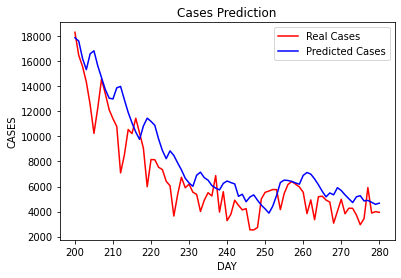

In [253]:
# Visualising the results
plt.plot(data.loc[200:, 'DAY'].values, testing_set[:, 0], color = 'red', label = 'Real Cases')
plt.plot(data.loc[200:, 'DAY'].values, predicted_cases[:, 0], color = 'blue', label = 'Predicted Cases')
# plt.xticks(np.arange(0,459,50))
plt.title('Cases Prediction')
plt.xlabel('DAY')
plt.ylabel('CASES')
plt.legend()
plt.show()
#6-6

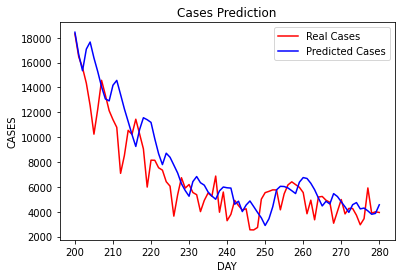

In [248]:
# Visualising the results
plt.plot(data.loc[200:, 'DAY'].values, testing_set[:, 0], color = 'red', label = 'Real Cases')
plt.plot(data.loc[200:, 'DAY'].values, predicted_cases[:, 0], color = 'blue', label = 'Predicted Cases')
# plt.xticks(np.arange(0,459,50))
plt.title('Cases Prediction')
plt.xlabel('DAY')
plt.ylabel('CASES')
plt.legend()
plt.show()
#6-5

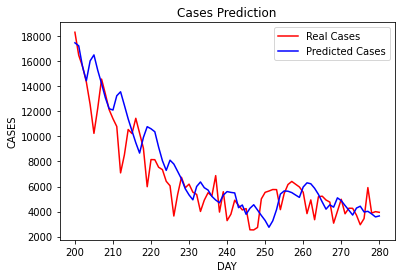

In [220]:
# Visualising the results
plt.plot(data.loc[200:, 'DAY'].values, testing_set[:, 0], color = 'red', label = 'Real Cases')
plt.plot(data.loc[200:, 'DAY'].values, predicted_cases[:, 0], color = 'blue', label = 'Predicted Cases')
# plt.xticks(np.arange(0,459,50))
plt.title('Cases Prediction')
plt.xlabel('DAY')
plt.ylabel('CASES')
plt.legend()
plt.show()
#5-5

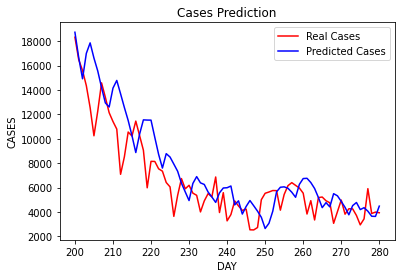

In [258]:
# Visualising the results
plt.plot(data.loc[200:, 'DAY'].values, testing_set[:, 0], color = 'red', label = 'Real Cases')
plt.plot(data.loc[200:, 'DAY'].values, predicted_cases[:, 0], color = 'blue', label = 'Predicted Cases')
# plt.xticks(np.arange(0,459,50))
plt.title('Cases Prediction')
plt.xlabel('DAY')
plt.ylabel('CASES')
plt.legend()
plt.show()
#5-4

[10:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


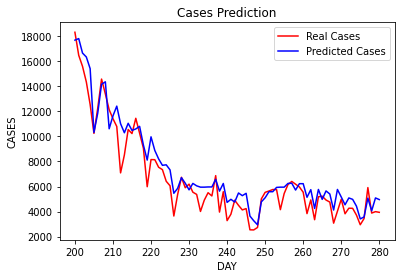

In [243]:
import xgboost as xgb
alg = xgb.XGBRegressor()

alg.fit(train_X, train_y)

predicted_cases = alg.predict(test_X)
predicted_cases = predicted_cases.reshape(-1, 1)
predicted_cases = sc.inverse_transform(predicted_cases)


# Visualising the results
plt.plot(data.loc[200:, 'DAY'].values, testing_set[:, 0], color = 'red', label = 'Real Cases')
plt.plot(data.loc[200:, 'DAY'].values, predicted_cases[:, 0], color = 'blue', label = 'Predicted Cases')
# plt.xticks(np.arange(0,459,50))
plt.title('Cases Prediction')
plt.xlabel('DAY')
plt.ylabel('CASES')
plt.legend()
plt.show()
# 5-5